# 심부전증 데이터를 활용한 분류
----------

   
#### Heart Failure Prediction 데이터셋
    
    - heart_failure_clinical_records_dataset.csv
    
    - 피처설명
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


#### 데이터준비

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# csv파일 읽어들이기
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

#### EDA 및 데이터 기초 통계 분석

In [7]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()
df.info()
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


In [23]:
features=df.iloc[:,[0,2,4,6,7,8,11,12]].columns

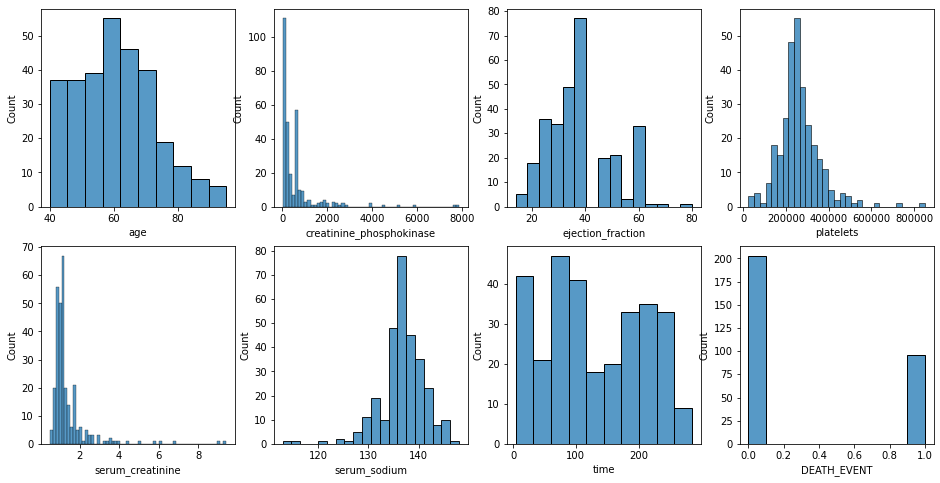

In [35]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
for i,feature in enumerate(features):
    row=int(i/4)
    col=i%4
    sns.histplot(df[feature],ax=axs[row][col])



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

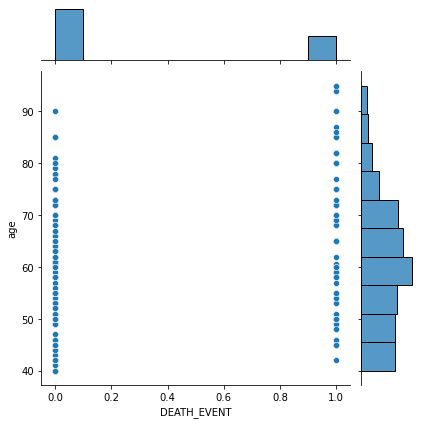

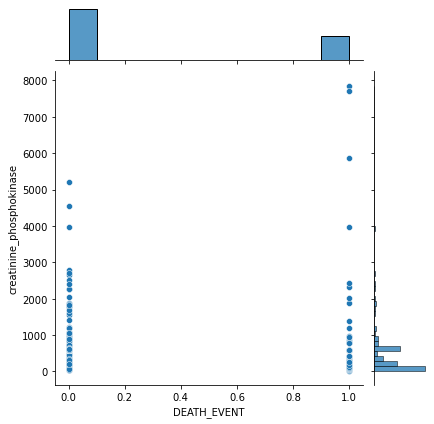

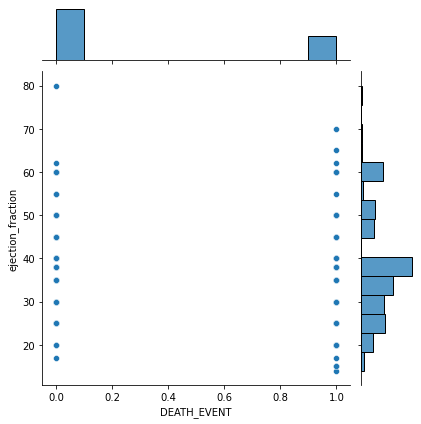

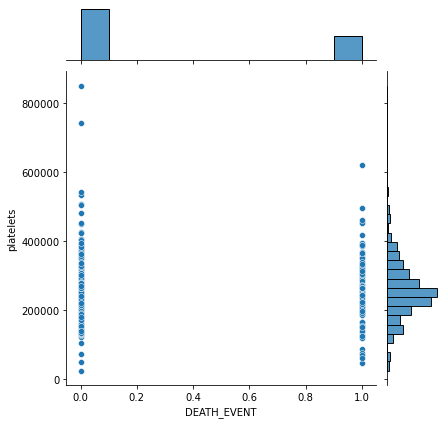

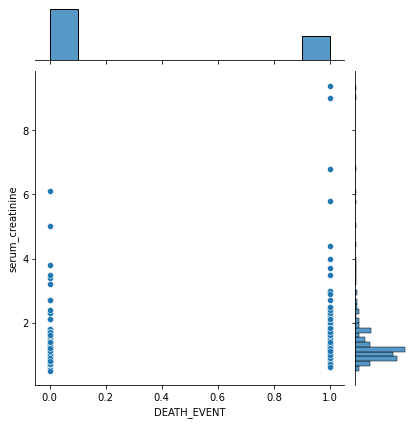

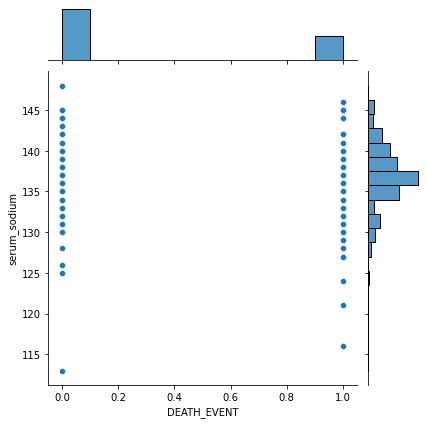

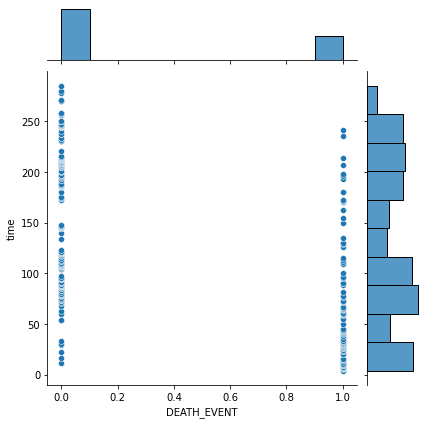

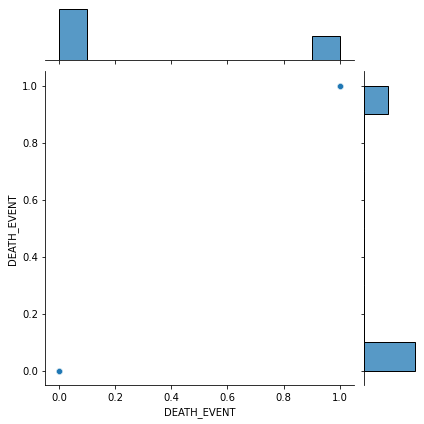

In [37]:
for i,feature in enumerate(features):
    row=int(i/4)
    col=i%4
    sns.jointplot(df['DEATH_EVENT'],df[feature],ax=axs[row][col])

In [ ]:
sns.pairplot(df.iloc[:,[0,2,4,6,7,8,11,12]])

In [ ]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용 - 범주별 통계 확인
# 범주 세분화





####  모델 학습을 위한 데이터 전처리


In [1]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = 
X_cat = 
y = 

In [ ]:
# 수치형 입력 데이터 표준화
scaler =
X = 

#### 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 

#### Classification 모델 학습하기

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = 




#### 모델 학습 결과 평가하기

In [ ]:
# Predict를 수행하고 평가 결과 출력하기
pred = 




#### XGBoost 모델 생성/학습하기

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_xgb = 




#### 모델 학습 결과 평가하기


In [ ]:
# Predict를 수행하고 평가 결과 출력하기
pred = 




### 문제 13. 특징의 중요도 확인하기


In [ ]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot





## Step5 모델 학습 결과 심화 분석하기


#### Precision-Recall 커브 확인하기

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
# 두 모델의 Precision-Recall 커브곡선 시각화





#### ROC 커브 확인하기

In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
# 두 모델의 ROC 커브 시각화



